# D207 PA - Doug Haunsperger


In [1]:
# Do initial package import and data read
import pandas as pd
import numpy as np
from scipy import stats


df = pd.read_csv('medical_clean.csv')

#view first 5 rows
#df.head(5)

In [2]:
#Split the data frame into the two populations to be compared based on 'ReAdmis' value (Hayden, Lesson 1, n.d.)
df_no = df[df.ReAdmis == "No"]
df_yes = df[df.ReAdmis == "Yes"]

#df_no.info()
#df_yes.info()

In [3]:
# Perform a two sample t-test (Hayden, n.d.)
stats.ttest_ind(df_yes.VitD_levels, df_no.VitD_levels)

Ttest_indResult(statistic=0.40822135318600616, pvalue=0.683119914739662)

<Axes: xlabel='VitD_levels', ylabel='Count'>

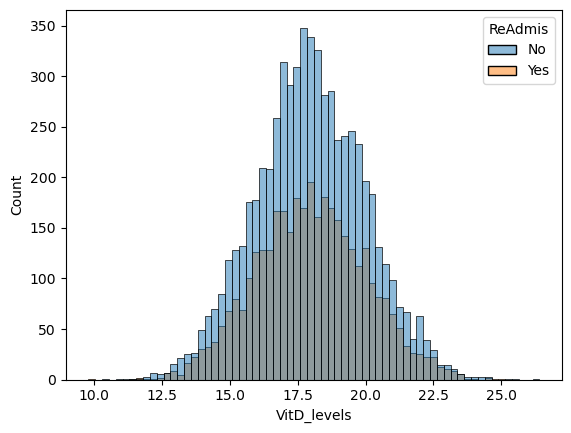

In [4]:
import seaborn as sns
sns.histplot(data=df,x='VitD_levels',hue="ReAdmis")

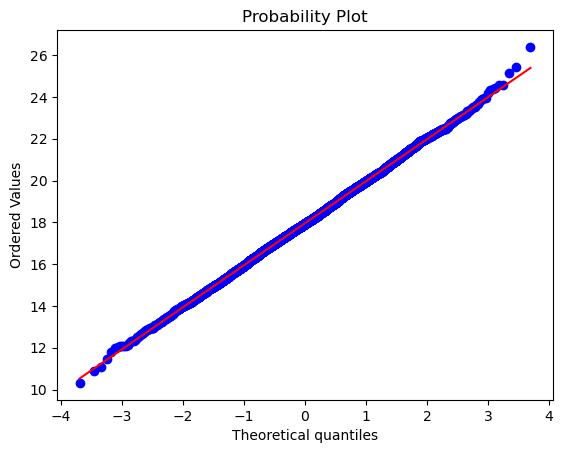

In [5]:
# Check for normality using Q-Q plot (Scipy, 2023) 
import matplotlib.pyplot as plt
res=stats.probplot(x=df_no.VitD_levels, plot=plt)
plt.show()

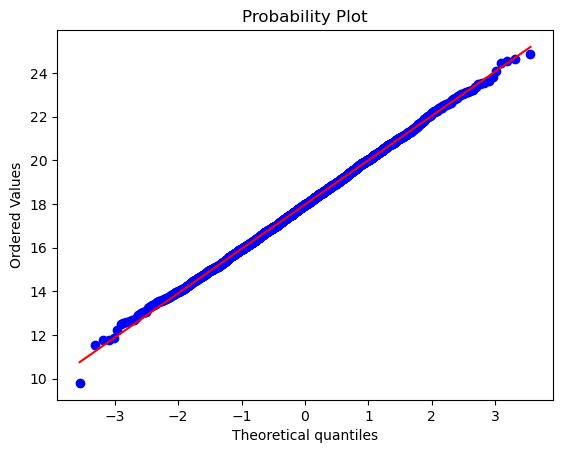

In [6]:
res=stats.probplot(x=df_yes.VitD_levels, plot=plt)
plt.show()

In [7]:
print(df_no.VitD_levels.std())
print(df_yes.VitD_levels.std())

2.01003891985681
2.0298105470515524


## Univariate Visualizations

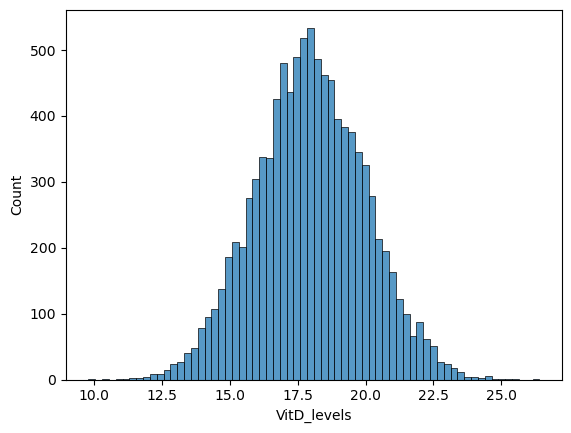

In [8]:
# Histograms of continuous variables - VitD_levels, Income
plot = sns.histplot(data=df,x='VitD_levels')

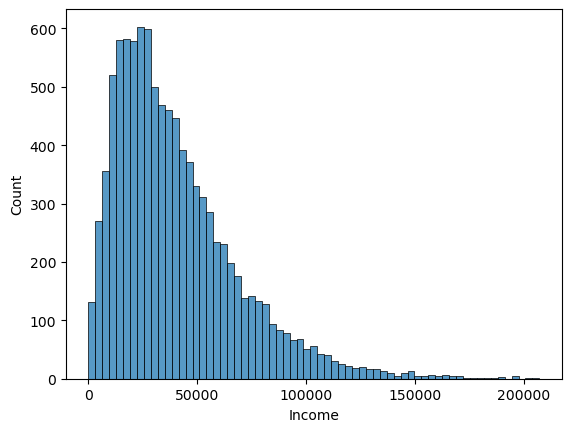

In [9]:
plot = sns.histplot(data=df,x='Income')

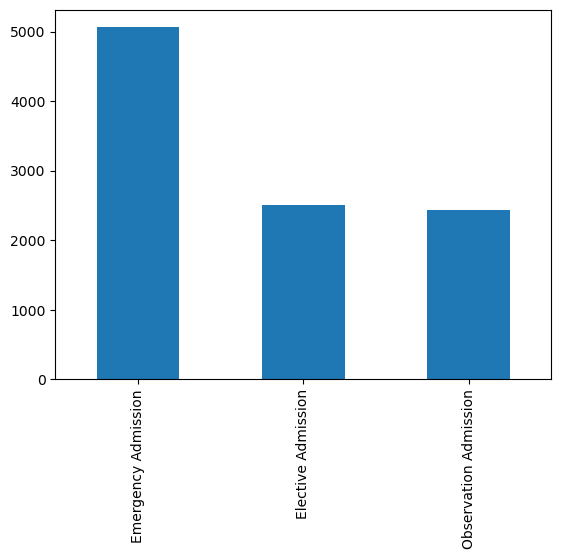

In [10]:
# Visualizing categorical variables Initial_admin, Area with bar charts (Sudheer, 2023)
plot = df['Initial_admin'].value_counts().plot.bar()

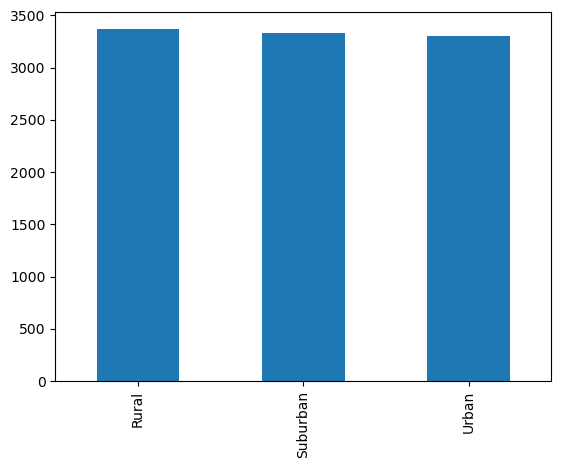

In [11]:
plot = df['Area'].value_counts().plot.bar()

## Bivariate visuals

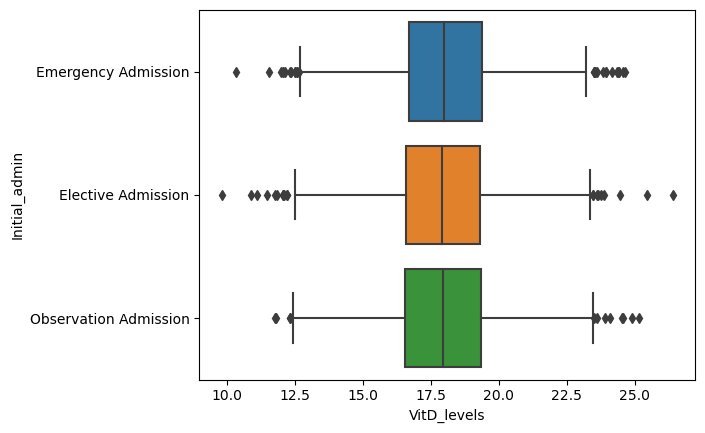

In [12]:
# Code ref : (Kumar, 2022)
plot = sns.boxplot(x='VitD_levels', y='Initial_admin', data=df)

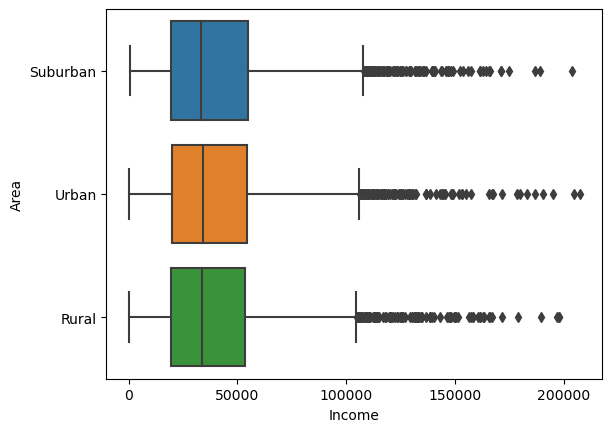

In [13]:
plot = sns.boxplot(x='Income', y='Area', data=df)

## Check the analysis result for chance of Type II error

In [14]:
# Code ref : (Hayden, Lesson 3, n.d.)
from statsmodels.stats import power as pwr
readm_yes_count = float(len(df_yes.ReAdmis)) # Sample 1
readm_no_count = float(len(df_no.ReAdmis)) # Sample 2
ratio = readm_no_count / readm_yes_count

analysis = pwr.TTestIndPower()

esresult = analysis.solve_power(
    effect_size = None,
    nobs1 = readm_yes_count,
    alpha = 0.05,
    power = 0.95,  # What effect size can we detect with our sample size with 95% probability of avoiding a Type II error?
    alternative = 'two-sided')

print(esresult)

0.08417486271765107
